# AutoML and Ensemble Learning with H2O.ai 

* [Introduction to H2O ai](https://medium.com/@jamal.robinson/introduction-to-h2o-ai-1ba51a884f02)
* [getting started](http://docs.h2o.ai/h2o/latest-stable/h2o-r/docs/articles/getting_started.html)
* [AutoML workflow](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html)
* [Performance and Prediction](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/performance-and-prediction.html)
* [AutoML variable importance](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/variable-importance.html)
* [Available algorithms](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/exclude_algos.html)

In [1]:
install.packages( "tictoc")
library( tictoc )
tic()
install.packages( "h2o")
install.packages( "GGally" )
install.packages( "skimr" )
toc()

library( tidyverse )
library( GGally )
library( skimr )
library( h2o )
h2o.init()


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa



# Unequal variance data example

In [2]:
unequal_var_data <- read_csv( 'https://raw.githubusercontent.com/colettace/Revue_of_Models_for_StatInf_ML/master/day04_materials/unequal_variance_data.csv' ) %>% 
    mutate( Y = factor( Y ) )

Parsed with column specification:
cols(
  `0` = col_double(),
  `1` = col_double(),
  `2` = col_double(),
  `3` = col_double(),
  `4` = col_double(),
  `5` = col_double(),
  `6` = col_double(),
  `7` = col_double(),
  `8` = col_double(),
  `9` = col_double(),
  Y = col_double()
)


In [5]:
skim( unequal_var_data )

type,variable,missing,complete,n,n_unique,top_counts,ordered,mean,sd,p0,p25,p50,p75,p100,hist
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
factor,Y,0,200,200,2,"-1: 109, 1: 91, NA: 0",FALSE,NA,NA,NA,NA,NA,NA,NA,NA
numeric,0,0,200,200,NA,NA,NA,-0.12,0.96,-3.3,-0.71,-0.19,0.43,2.32,▁▁▂▇▇▅▂▂
numeric,1,0,200,200,NA,NA,NA,0.014,0.92,-2.38,-0.61,-0.017,0.64,2.7,▁▂▆▇▆▅▁▁
numeric,2,0,200,200,NA,NA,NA,0.092,0.99,-2.84,-0.56,0.15,0.75,2.39,▁▂▃▆▇▇▃▂
numeric,3,0,200,200,NA,NA,NA,0.011,0.98,-2.41,-0.6,-0.052,0.64,2.8,▁▂▇▇▆▃▂▁
numeric,4,0,200,200,NA,NA,NA,0.009,0.92,-2.58,-0.72,-0.027,0.7,3.03,▁▂▆▇▆▅▁▁
numeric,5,0,200,200,NA,NA,NA,0.05,1.1,-3.45,-0.7,0.052,0.9,3.31,▁▁▅▇▇▆▂▁
numeric,6,0,200,200,NA,NA,NA,0.0053,1.02,-2.63,-0.62,-0.019,0.76,2.63,▁▂▃▇▆▆▂▁
numeric,7,0,200,200,NA,NA,NA,-0.0087,1.02,-3.07,-0.7,0.019,0.69,2.47,▁▁▃▆▇▇▃▁


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


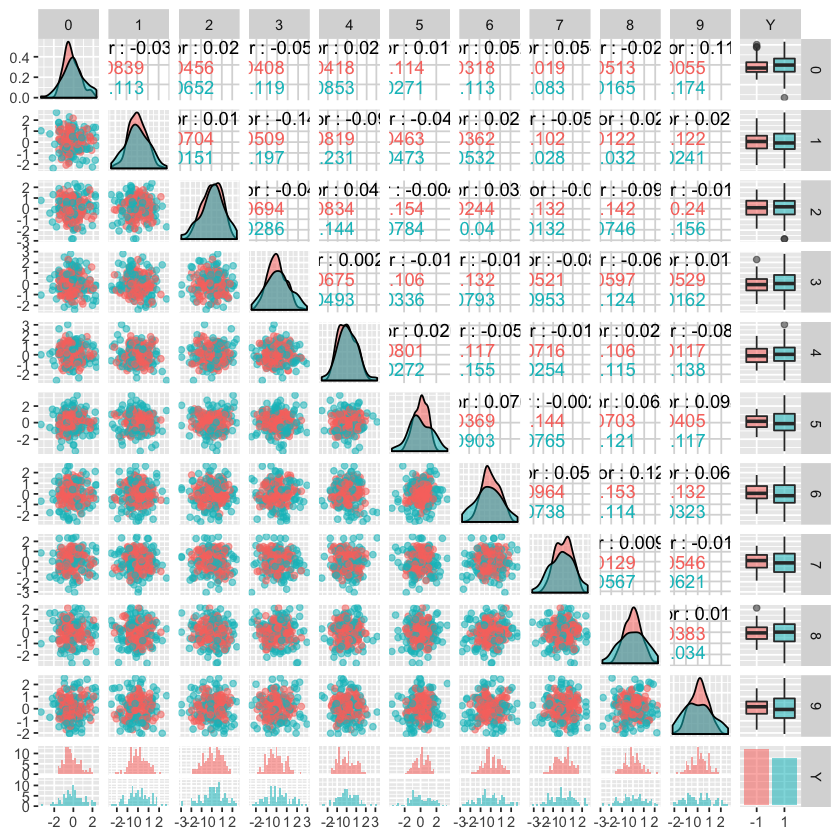

In [6]:
ggpairs( unequal_var_data, aes( alpha=0.1, color=Y ) )

In [9]:
unequal_var_data = as.h2o( unequal_var_data )

  |======================================================================| 100%


In [10]:
class( unequal_var_data )

[1] "H2OFrame"

In [11]:
summary( unequal_var_data )

Warning message in summary.H2OFrame(unequal_var_data):
“Approximated quantiles computed! If you are interested in exact quantiles, please pass the `exact_quantiles=TRUE` parameter.”

 0                 1                  2                  3                 
 Min.   :-3.3010   Min.   :-2.38189   Min.   :-2.83698   Min.   :-2.41305  
 1st Qu.:-0.7189   1st Qu.:-0.61613   1st Qu.:-0.56368   1st Qu.:-0.60635  
 Median :-0.1952   Median :-0.01907   Median : 0.14354   Median :-0.05626  
 Mean   :-0.1203   Mean   : 0.01376   Mean   : 0.09163   Mean   : 0.01124  
 3rd Qu.: 0.4310   3rd Qu.: 0.63388   3rd Qu.: 0.74487   3rd Qu.: 0.64244  
 Max.   : 2.3152   Max.   : 2.69944   Max.   : 2.39199   Max.   : 2.80109  
 4                   5                  6                   7                  
 Min.   :-2.577600   Min.   :-3.44532   Min.   :-2.632282   Min.   :-3.069000  
 1st Qu.:-0.720913   1st Qu.:-0.70444   1st Qu.:-0.623167   1st Qu.:-0.697988  
 Median :-0.030965   Median : 0.05045   Median :-0.021879   Median : 0.015672  
 Mean   : 0.008994   Mean   : 0.05048   Mean   : 0.005324   Mean   :-0.008708  
 3rd Qu.: 0.699650   3rd Qu.: 0.89821   3rd Qu.: 0.755715   3rd Qu.:

## Split into train val test

* H2O you give your "desired" train/val/test ratios and it gives you back approximately the proportions you want
* E.g., Say we want 500 samples for training, 100 samples for validation and 400 samples for test data:

In [12]:
unequal_splits <- h2o.splitFrame( unequal_var_data, ratios=c(0.5) )

In [13]:
unequal_train <- unequal_splits[[1]]
unequal_test <- unequal_splits[[2]]

In [14]:
dim( unequal_train )

[1] 109  11

In [15]:
dim( unequal_test )

[1] 91 11

In [17]:
tic()
aml_results <- h2o.automl(
    # x is omitted since we want to use all the columns except "Y" as predictors
    y = 'Y',
    training_frame = unequal_train,
    leaderboard_frame = unequal_test,
    max_runtime_secs = 120,
    exclude_algos = 'GBM',
)
toc()

  |======================================================================| 100%
112.521 sec elapsed


## AutoML results

* Printing the results object shows you info from the winning "leader" model, and well as the "leaderboard" of how well the various models performed

In [18]:
dim( aml_results@leaderboard )

[1] 26  6

In [19]:
as.data.frame( aml_results@leaderboard  )

model_id,auc,logloss,mean_per_class_error,rmse,mse
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
StackedEnsemble_BestOfFamily_AutoML_20190627_121345,0.8590909,0.5101965,0.2148990,0.4099840,0.1680869
DeepLearning_grid_1_AutoML_20190627_121345_model_5,0.8348485,0.5894617,0.1886364,0.4272238,0.1825202
StackedEnsemble_AllModels_AutoML_20190627_121345,0.8242424,0.5238543,0.2159091,0.4155554,0.1726863
XGBoost_grid_1_AutoML_20190627_121345_model_1,0.8111111,0.5449321,0.2479798,0.4291174,0.1841417
XRT_1_AutoML_20190627_121345,0.8000000,0.5499661,0.2378788,0.4319978,0.1866221
DRF_1_AutoML_20190627_121345,0.7914141,0.5408793,0.2603535,0.4309325,0.1857028
DeepLearning_grid_1_AutoML_20190627_121345_model_1,0.7777778,0.5968758,0.2699495,0.4466572,0.1995026
XGBoost_grid_1_AutoML_20190627_121345_model_6,0.7575758,0.6706766,0.2527778,0.4694154,0.2203508
XGBoost_grid_1_AutoML_20190627_121345_model_2,0.7388889,0.6208542,0.2666667,0.4636881,0.2150066


In [ ]:
h2o.performance( aml_results@leader )

In [20]:
getParms( aml_results@leader )
# or a synonym:
# aml_results@leader@parameters

$model_id
[1] "StackedEnsemble_BestOfFamily_AutoML_20190627_121345"

$training_frame
[1] "automl_training_RTMP_sid_971b_3"

$base_models
$base_models[[1]]
$base_models[[1]]$`__meta`
$base_models[[1]]$`__meta`$schema_version
[1] 3

$base_models[[1]]$`__meta`$schema_name
[1] "ModelKeyV3"

$base_models[[1]]$`__meta`$schema_type
[1] "Key<Model>"


$base_models[[1]]$name
[1] "DeepLearning_grid_1_AutoML_20190627_121345_model_5"

$base_models[[1]]$type
[1] "Key<Model>"

$base_models[[1]]$URL
[1] "/3/Models/DeepLearning_grid_1_AutoML_20190627_121345_model_5"


$base_models[[2]]
$base_models[[2]]$`__meta`
$base_models[[2]]$`__meta`$schema_version
[1] 3

$base_models[[2]]$`__meta`$schema_name
[1] "ModelKeyV3"

$base_models[[2]]$`__meta`$schema_type
[1] "Key<Model>"


$base_models[[2]]$name
[1] "XGBoost_grid_1_AutoML_20190627_121345_model_1"

$base_models[[2]]$type
[1] "Key<Model>"

$base_models[[2]]$URL
[1] "/3/Models/XGBoost_grid_1_AutoML_20190627_121345_model_1"


$base_models[[3]]
$base_models[[3]]$`__meta`
$base_models[[3]]$`__meta`$schema_version
[1] 3

$base_models[[3]]$`__meta`$schema_name
[1] "ModelKeyV3"

$base_models[[3]]$`__meta`$schema_type
[1] "Key<Model>"


$base_models[[3]]$name
[1] "XRT_1_AutoML_20190627_121345"

$base_models[[3]]$type
[1] "Key<Model>"

$base_models[[3]]$URL
[1] "/3/Models/XRT_1_AutoML_20190627_121345"


$base_models[[4]]
$base_models[[4]]$`__meta`
$base_models[[4]]$`__meta`$schema_version
[1] 3

$base_models[[4]]$`__meta`$schema_name
[1] "ModelKeyV3"

$base_models[[4]]$`__meta`$schema_type
[1] "Key<Model>"


$base_models[[4]]$name
[1] "DRF_1_AutoML_20190627_121345"

$base_models[[4]]$type
[1] "Key<Model>"

$base_models[[4]]$URL
[1] "/3/Models/DRF_1_AutoML_20190627_121345"


$base_models[[5]]
$base_models[[5]]$`__meta`
$base_models[[5]]$`__meta`$schema_version
[1] 3

$base_models[[5]]$`__meta`$schema_name
[1] "ModelKeyV3"

$base_models[[5]]$`__meta`$schema_type
[1] "Key<Model>"


$base_models[[5]]$name
[1] "GLM_grid_1_AutoML_20190627_121345_model_1"

$base_models[[5]]$type
[1] "Key<Model>"

$base_models[[5]]$URL
[1] "/3/Models/GLM_grid_1_AutoML_20190627_121345_model_1"



$metalearner_nfolds
[1] 5

$seed
[1] "-9152382088731368410"

$keep_levelone_frame
[1] TRUE

$x
 [1] "0" "1" "2" "3" "4" "5" "6" "7" "8" "9"

$y
[1] "Y"

In [27]:
Y_pred <- as.data.frame( predict( aml_results@leader, unequal_test ) )

  |======================================================================| 100%


In [28]:
Y_pred

predict,p.1,p1
<fct>,<dbl>,<dbl>
1,0.5470479,0.4529521
1,0.3189163,0.6810837
1,0.2299066,0.7700934
1,0.1745561,0.8254439
-1,0.7220257,0.2779743
1,0.1884686,0.8115314
1,0.2530447,0.7469553
1,0.2374462,0.7625538
1,0.1561083,0.8438917


## Visualize mistakes

* HC = High-variance correct
* HI = High-variance incorrect
* LC = Low-variance correct
* LI = Low-variance incorrect

In [62]:
test_data <- as.data.frame( unequal_test )

In [63]:
dim( test_data )

[1] 91 11

In [64]:
dim( Y_pred )

[1] 91  3

In [66]:
prob1 <- Y_pred$p1

In [71]:
aug <- test_data %>% 
    cbind( prob1 ) %>%
    mutate( Y=if_else( as.character( Y ) == '-1', 0, 1 ) ) %>%
    mutate( prob1_round=round( prob1 ) )

In [89]:
aug$class <- 'LC'

In [90]:
aug[ (aug$Y == 1) & (aug$prob1_round == 1), 'class' ] <- 'HC'
aug[ (aug$Y == 1) & (aug$prob1_round == 0), 'class' ] <- 'HI'
aug[ (aug$Y == 0) & (aug$prob1_round == 1), 'class' ] <- 'LI'

In [91]:
aug$class <- factor( aug$class )

In [92]:
options( repr.plot.width=10, repr.plot.height=10 )

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


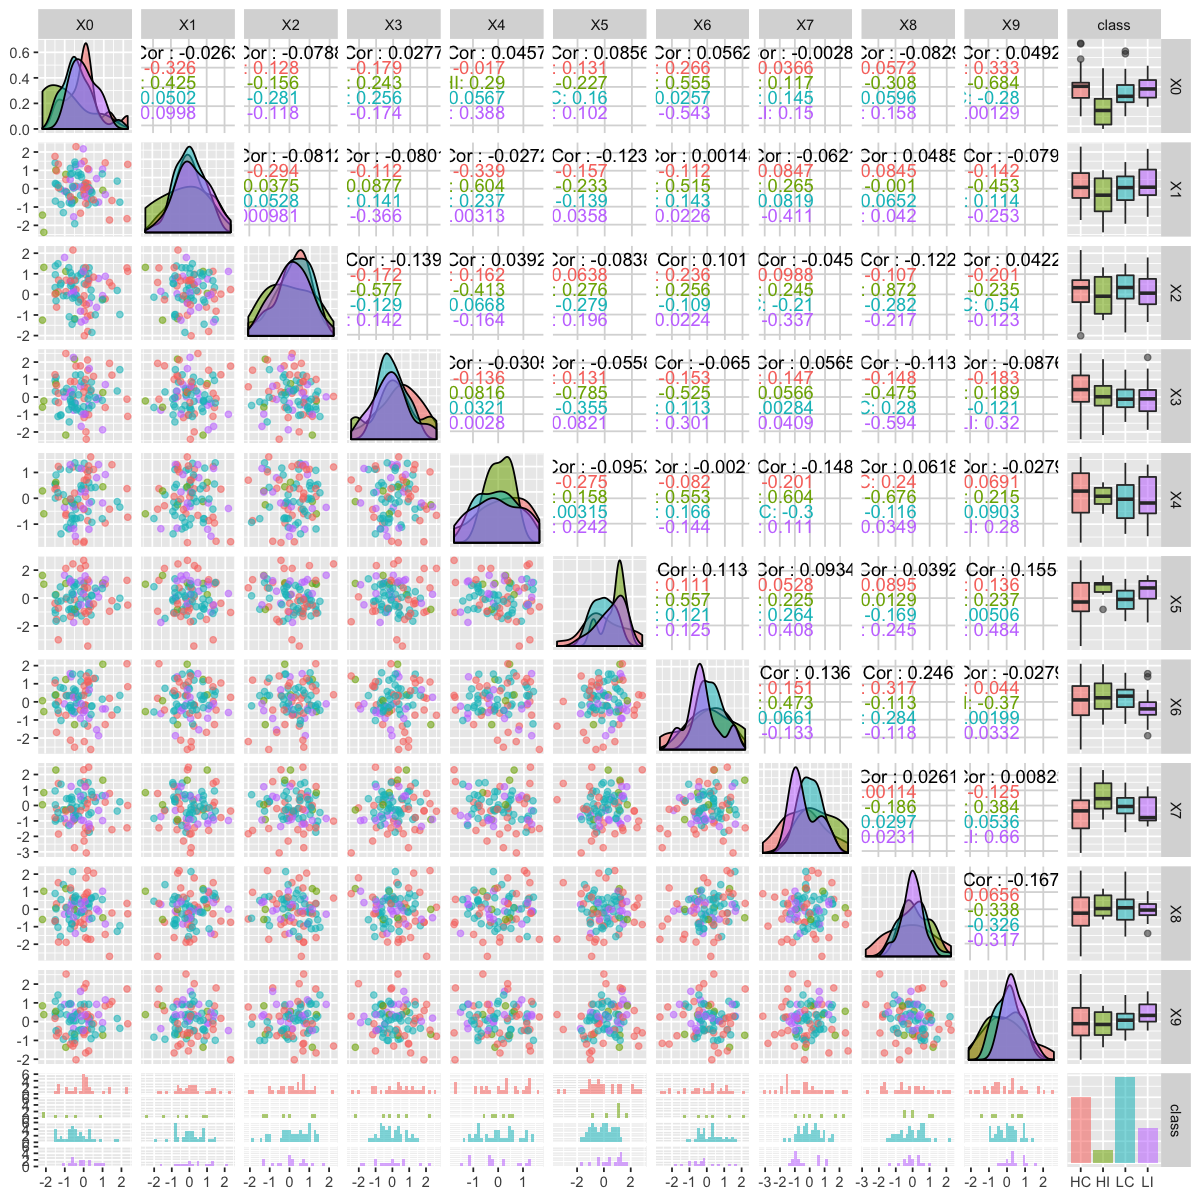

In [93]:
aug %>% 
    select( -Y, -prob1, -prob1_round ) %>%
    ggpairs( aes( color=class, alpha=0.1))